# English Wikipedia page views, 2008 - 2017

### Project Overview
#### This project aims to construct, analyze, and publish a dataset of monthly traffic on English Wikipedia from July 1 2008 through September 30 2017.
#### The project is consisted of three steps, data acquision, data processing and data analysis. The result will be presented in as a graph visualization tracking three traffic metrics: mobile traffic, desktop traffic, and all traffic(mobile + desktop).

### Step1: Data Acquision
#### I. In this step, data was collected from two different API endpoints, the Pagecounts API and the Pageviews API. In May 2015, a new pageview definition took effect, which eliminates all crawler traffic. The Pageviews API allows us to access the data under new definition, while the Pagecounts API stores the legacy pageview data. 
#### II. The legacy pagecounts data was collected on a monthly basis from January 2008 through July 2016 on desktop and mobile traffic. Results are stored in "pagecounts_desktop-site_200801-201607.json" and "pagecounts_mobile-site_200801-201607.json" respectively.
#### III. The pageviews data was collected on a monthly basis from July 2015 through September 2017 on desktop, mobile-web and mobile-app traffic. Results are stored in "pageviews_desktop_201507-201709.json", "pageviews_mobile-web_201507-201709" and "pageviews_mobile-app_201507-201709" respectively.

#### import libraries

In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from pylab import *
%matplotlib inline

#### connect with Wikimedia REST API endpoints to acquire data
I.Connect with the legacy Pagecounts API for desktop and mobile traffic data from January 2008 through July 2016.

In [2]:
endpoint = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access}/{granularity}/{start}/{end}'

headers={'User-Agent' : 'https://github.com/sliwhu', 'From' : 'shali@uw.edu'}

params1 = {'project' : 'en.wikipedia.org',
            'access' : 'desktop-site',
            'granularity' : 'monthly',
            'start' : '2008010100',
            'end' : '2016070100'
            }
params2 = {'project' : 'en.wikipedia.org',
            'access' : 'mobile-site',
            'granularity' : 'monthly',
            'start' : '2008010100',
            'end' : '2016070100'
            }
api_call1 = requests.get(endpoint.format(**params1))
api_call2 = requests.get(endpoint.format(**params2))
pagecounts_desktop_site_200801_201607 = api_call1.json()
pagecounts_mobile_site_200801_201607 = api_call2.json()

II. Connect with the Pageviews API for desktop and mobile traffic data from January 2008 through July 2016.

In [3]:
endpoint = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

headers={'User-Agent' : 'https://github.com/sliwhu', 'From' : 'shali@uw.edu'}

params1 = {'project' : 'en.wikipedia.org',
            'access' : 'desktop',
            'agent' : 'user',
            'granularity' : 'monthly',
            'start' : '2015070100',
            'end' : '2017090100'
            }
params2 = {'project' : 'en.wikipedia.org',
            'access' : 'mobile-web',
            'agent' : 'user',
            'granularity' : 'monthly',
            'start' : '2015070100',
            'end' : '2017090100'
            }
params3 = {'project' : 'en.wikipedia.org',
            'access' : 'mobile-app',
            'agent' : 'user',
            'granularity' : 'monthly',
            'start' : '2015070100',
            'end' : '2017090100'
            }
api_call1 = requests.get(endpoint.format(**params1))
api_call2 = requests.get(endpoint.format(**params2))
api_call3 = requests.get(endpoint.format(**params3))
pageviews_desktop_201507_201709 = api_call1.json()
pageviews_mobile_web_201507_201709 = api_call2.json()
pageviews_mobile_app_201507_201709 = api_call3.json()

#### Store data in json files

In [4]:
with open('pagecounts_desktop-site_200801-201607', 'w') as outfile:
    json.dump(pagecounts_desktop_site_200801_201607, outfile)
with open('pagecounts_mobile-site_200801-201607', 'w') as outfile:
    json.dump(pagecounts_mobile_site_200801_201607, outfile)
with open('pageviews_desktop_201507-201709', 'w') as outfile:
    json.dump(pageviews_desktop_201507_201709, outfile)
with open('pageviews_mobile-web_201507-201709', 'w') as outfile:
    json.dump(pageviews_mobile_web_201507_201709, outfile)
with open('pageviews_mobile-app_201507-201709', 'w') as outfile:
    json.dump(pageviews_mobile_app_201507_201709, outfile)

### Step2: Data Processing
#### A series of processing steps were performed on the data files from step 1 to prepare them for analysis. 
#### I. Read json file into python dataframe.
#### II. Extract year, month and count data.
#### III. Set months with views not available as 0. 
#### IV. Combine mobile-app and mobile-web views in pageviews for a total mobile traffic for each month.
#### V. Combine desktop and mobile views for a total pageviews on a monthly basis for legacy pagecounts and pageviews respectively.
#### VI. Export data into a CSV-formatted file "en-wikipedia_traffic_200801-201709.csv".

#### I. Read json file into python dataframe.

In [5]:
df1 = pd.DataFrame.from_dict(pagecounts_desktop_site_200801_201607['items'])
df2 = pd.DataFrame.from_dict(pagecounts_mobile_site_200801_201607['items'])
df3 = pd.DataFrame.from_dict(pageviews_desktop_201507_201709['items'])
df4 = pd.DataFrame.from_dict(pageviews_mobile_web_201507_201709['items'])
df5 = pd.DataFrame.from_dict(pageviews_mobile_app_201507_201709['items'])

#### II. Extract year, month and count data.
#### III. Set months with views not available as 0. 

In [6]:
for df in [df1, df2]:
    year=[x[:4] for x in df.timestamp]
    month=[x[4:6] for x in df.timestamp]
    df['year']=year
    df['month']=month
    
for df in [df3, df4, df5]:
    year=[x[:4] for x in df.timestamp]
    month=[x[4:6] for x in df.timestamp]
    df['year']=year
    df['month']=month
df1 = df1[['year', 'month', 'count']]
df2 = df2[['year', 'month', 'count']]
df3 = df3[['year', 'month', 'views']]
df4 = df4[['year', 'month', 'views']]
df5 = df5[['year', 'month', 'views']]

In [7]:
pagecount = pd.merge(df1, df2, how='outer', on=['year', 'month'], suffixes=['_desktop_views', '_mobile_views'])
pagecount['count_mobile_views'].fillna(0, inplace=True)
pagecount['count_mobile_views'] = pagecount['count_mobile_views'].astype('int64')
pagecount.head()

,year,month,count_desktop_views,count_mobile_views
0,2008,01,4930902570,0
1,2008,02,4818393763,0
2,2008,03,4955405809,0
3,2008,04,5159162183,0
4,2008,05,5584691092,0


#### IV. Combine mobile-app and mobile-web views in pageviews for a total mobile traffic for each month.

In [8]:
pageview_mobile = pd.merge(df4,df5, how='outer', on=['year', 'month'])
pageview_mobile['views'] = pageview_mobile['views_x'] + pageview_mobile['views_y']
pageview_mobile = pageview_mobile[['year', 'month', 'views']]
pageview = pd.merge(df3, pageview_mobile, how='outer', on=['year', 'month'], suffixes=['_desktop_views', '_mobile_views'])
pageview.head()

,year,month,views_desktop_views,views_mobile_views
0,2015,07,4376666686,3288755294
1,2015,08,4332482183,3302333038
2,2015,09,4485491704,3170203333
3,2015,10,4477532755,3268499132
4,2015,11,4287720220,3236601070


#### V. Combine desktop and mobile views for a total pageviews on a monthly basis for legacy pagecounts and pageviews respectively.

In [9]:
orig = pagecount.dtypes.to_dict()
traffic = pd.merge(pagecount, pageview, how='outer', on=['year', 'month'])
traffic.fillna(0, inplace=True)
for column in traffic.columns.tolist():
    traffic[column] = traffic[column].astype('int64')

In [10]:
traffic['pagecount_all_views'] = traffic['count_desktop_views'] + traffic['count_mobile_views']
traffic['pageview_all_views'] = traffic['views_desktop_views'] + traffic['views_mobile_views']
cols = traffic.columns.tolist()
cols_reordered = cols[:2] + [cols[6]] + cols[2:4] + [cols[7]] + cols[4:6]
traffic = traffic[cols_reordered]
traffic.columns = ['year', 'month', 'pagecount_all_views', 'pagecount_desktop_views', 'pagecount_mobile_views', \
                   'pageview_all_views', 'pageview_desktop_views', 'pageview_mobile_views']
traffic

,year,month,pagecount_all_views,pagecount_desktop_views,pagecount_mobile_views,pageview_all_views,pageview_desktop_views,pageview_mobile_views
0,2008,1,4930902570,4930902570,0,0,0,0
1,2008,2,4818393763,4818393763,0,0,0,0
2,2008,3,4955405809,4955405809,0,0,0,0
3,2008,4,5159162183,5159162183,0,0,0,0
4,2008,5,5584691092,5584691092,0,0,0,0
5,2008,6,5712104279,5712104279,0,0,0,0
6,2008,7,5306302874,5306302874,0,0,0,0
7,2008,8,5140155519,5140155519,0,0,0,0
8,2008,9,5479533823,5479533823,0,0,0,0
9,2008,10,5679440782,5679440782,0,0,0,0


#### VI. Export data into a CSV-formatted file "en-wikipedia_traffic_200801-201709.csv".

In [11]:
traffic.to_csv('en-wikipedia_traffic_200801-201709.csv')

### Step3: Analysis
#### A graph visualization was produced and track three traffic metrics: mobile traffic, desktop traffic, and all traffic (mobile + desktop)  on both legacy pagecounts and pageviews from July 1 2008 through September 30 2017.
#### A few notes on the graph:
#### I. The overall time frame is from July 1 2008 through September 30 2017.
#### II. This visualization track three traffic metrics: mobile traffic, desktop traffic, and all traffic (mobile + desktop) and are represented by green, blue and black lines respectively. 
#### II. The legacy pagecounts is from January 2008 through July 2016, while pageviews is from July 2015 through September 2017. They're represented by dashed line and solid line respectively. 
#### III. The legacy pagecounts mobile traffic data is only available from October 2014 to  through July 2016.
#### IV. The views (y-axis) is on a scale of (X 1e10).

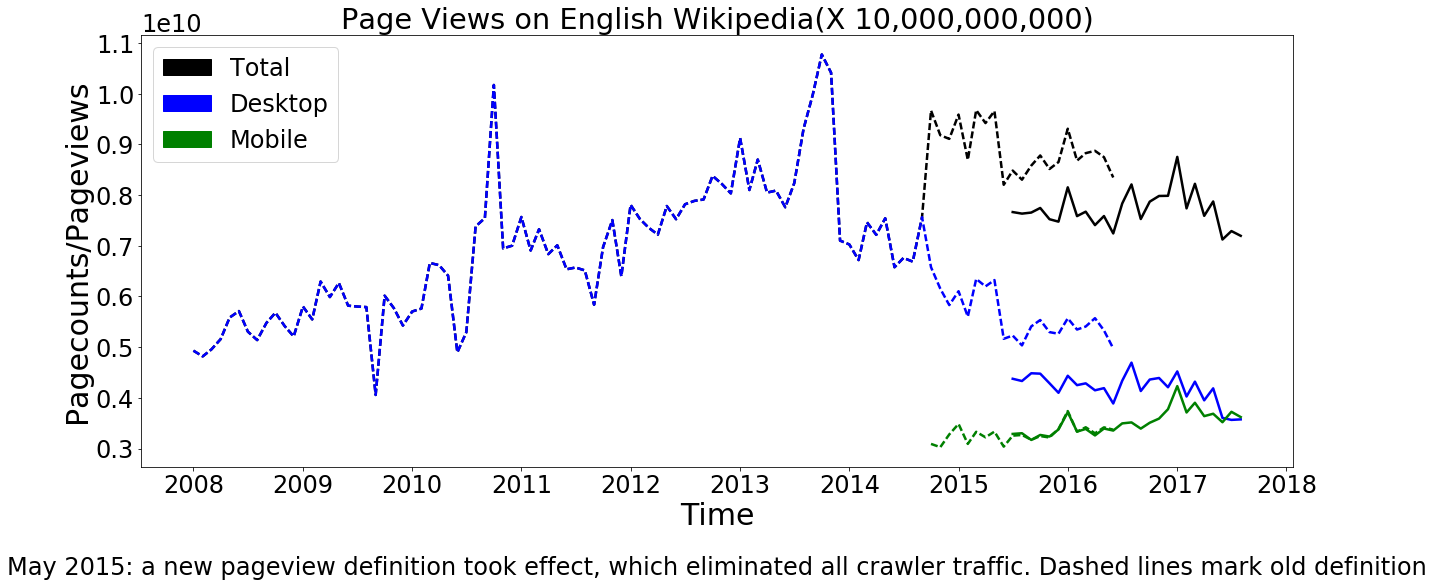

In [17]:
traffic['day'] = np.ones(116)
traffic['date'] = pd.to_datetime(traffic[['day','month','year']])
traffic.replace(0,np.NaN, inplace=True)
plt.rcParams.update({'font.size': 24})
fig = plt.figure(figsize=(20,10))
plt.plot(traffic['date'], traffic['pagecount_all_views'], color="black", linewidth=2.5, linestyle="--", label='Total_pagecounts')
plt.plot(traffic['date'], traffic['pagecount_desktop_views'], color="blue", linewidth=2.5, linestyle="--", label='Desktop_pagecounts')
plt.plot(traffic['date'], traffic['pagecount_mobile_views'], color="green", linewidth=2.5, linestyle="--", label='Mobile_pagecounts')
plt.plot(traffic['date'], traffic['pageview_all_views'], color="black", linewidth=2.5, linestyle="-", label='Total_pageviews')
plt.plot(traffic['date'], traffic['pageview_desktop_views'], color="blue", linewidth=2.5, linestyle="-", label='Desktop_pageviews')
plt.plot(traffic['date'], traffic['pageview_mobile_views'], color="green", linewidth=2.5, linestyle="-", label='Mobile_pageviews')

black_patch = mpatches.Patch(color='black', label='Total',linewidth=1)
blue_patch = mpatches.Patch(color='blue', label='Desktop',linewidth=1)
green_patch = mpatches.Patch(color='green', label='Mobile',linewidth=1)

plt.legend(handles=[black_patch, blue_patch, green_patch])
plt.xlabel('Time', fontsize=30)
plt.ylabel('Pagecounts/Pageviews', fontsize=30)
plt.title('Page Views on English Wikipedia(X 10,000,000,000)')
gca().set_position((.1, .2, .8, .6))
txt="May 2015: a new pageview definition took effect, which eliminated all crawler traffic. Dashed lines mark old definition"
traffic.replace(0,np.NaN, inplace=True)
fig.text(.5, .05, txt, ha='center')
plt.savefig("Finalplot.png")